<a href="https://colab.research.google.com/github/ioadeer/bi-bycing-ba-2021/blob/main/Clean_and_prepare_Recorridos_de_bicicletas_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys

import urllib.request
# from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams.update( mpl.rcParamsDefault ) 

Retrieve original

In [ ]:
"""
Recorridios bicicletas
"""
bicis_recorridos_url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2020.zip'
bicis_recorridos_zip = "./recorridos-realizados-2022.zip"
# bicis_recorridos_csv = './recorridos-realizados-2021.csv'
urllib.request.urlretrieve(
  bicis_recorridos_url,
  bicis_recorridos_zip
)


('./recorridos-realizados-2022.zip',
 <http.client.HTTPMessage at 0x7f2e86a9f7d0>)

In [ ]:
bicis_recorridos_2020_df = pd.read_csv(
    bicis_recorridos_zip,
    compression = 'zip',
    encoding = 'utf-8', 
)

In [ ]:
'''
read localy
bicis_recorridos_2021_df = pd.read_csv(
    '../sets/compressed/recorridos-realizados-2021.zip',
    compression = 'zip',
    encoding = 'utf-8', 
)
'''

In [ ]:
bicis_recorridos_2020_df.head()

,duracion_recorrido,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,periodo
0,882,116,2020-12-31 23:54:22,116 - HOSPITAL ALEMÁN,2021-01-01 00:09:04,214.0,142 - Armenia y Gorriti,666202,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
1,894,116,2020-12-29 12:39:18,116 - HOSPITAL ALEMÁN,2020-12-29 12:54:12,214.0,142 - Armenia y Gorriti,332689,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
2,1361,116,2020-12-21 21:21:38,116 - HOSPITAL ALEMÁN,2020-12-21 21:44:19,214.0,142 - Armenia y Gorriti,57949,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
3,1010,116,2020-12-20 21:58:19,116 - HOSPITAL ALEMÁN,2020-12-20 22:15:09,214.0,142 - Armenia y Gorriti,454846,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
4,1490,116,2020-12-20 13:32:53,116 - HOSPITAL ALEMÁN,2020-12-20 13:57:43,214.0,142 - Armenia y Gorriti,690975,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020


No handles with labels found to put in legend.


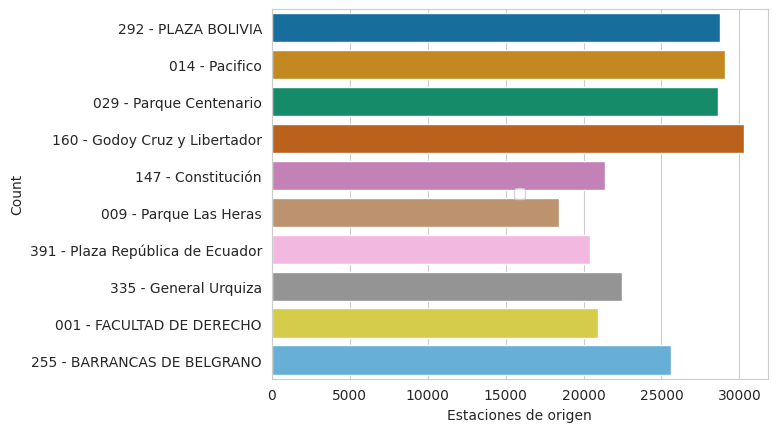

In [ ]:
top_10 = bicis_recorridos_2020_df['nombre_estacion_origen'].value_counts()[:10]
top_10.index

subset = bicis_recorridos_2020_df[ bicis_recorridos_2020_df['nombre_estacion_origen'].isin(top_10.index) ]
sns.set_style('whitegrid')
ax = sns.countplot( 
    y='nombre_estacion_origen',
    data = subset,
    palette = 'colorblind'
)
ax.legend(loc=10)
plt.xlabel("Estaciones de origen")
plt.ylabel("Count")
plt.show() 

No handles with labels found to put in legend.


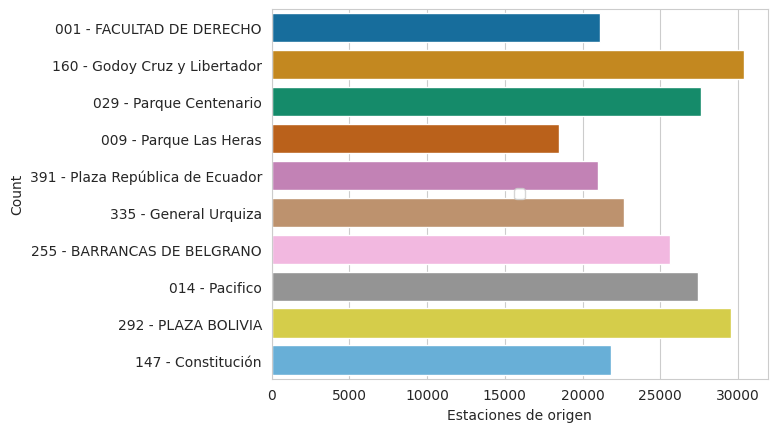

In [ ]:
top_10 = bicis_recorridos_2020_df['nombre_estacion_destino'].value_counts()[:10]
top_10.index

subset = bicis_recorridos_2020_df[ bicis_recorridos_2020_df['nombre_estacion_destino'].isin(top_10.index) ]
sns.set_style('whitegrid')
ax = sns.countplot( 
    y='nombre_estacion_destino',
    data = subset,
    palette = 'colorblind'
)
ax.legend(loc=10)
plt.xlabel("Estaciones de origen")
plt.ylabel("Count")
plt.show() 

In [ ]:
bicis_recorridos_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002945 entries, 0 to 2002944
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   duracion_recorrido          int64  
 1   id_estacion_origen          int64  
 2   fecha_origen_recorrido      object 
 3   nombre_estacion_origen      object 
 4   fecha_destino_recorrido     object 
 5   id_estacion_destino         float64
 6   nombre_estacion_destino     object 
 7   id_usuario                  int64  
 8   direccion_estacion_origen   object 
 9   long_estacion_origen        float64
 10  lat_estacion_origen         float64
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  periodo                     int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 229.2+ MB


### Procesar fecha

Parsear object datetime a dia, mes, año

In [ ]:
bicis_recorridos_2020_df['fecha_origen_recorrido']
formato = '%Y%m%d %H:%M:%S'
bicis_recorridos_2020_df['start datetime'] = pd.to_datetime(
    bicis_recorridos_2020_df['fecha_origen_recorrido'], 
    format = formato
)
bicis_recorridos_2020_df['START DATE'] = bicis_recorridos_2020_df['start datetime'].dt.strftime('%Y-%m-%d')
bicis_recorridos_2020_df['MES']  = bicis_recorridos_2020_df['start datetime'].dt.strftime('%B')
bicis_recorridos_2020_df['DIA']  = bicis_recorridos_2020_df['start datetime'].dt.strftime('%A')
bicis_recorridos_2020_df['TIME'] = bicis_recorridos_2020_df['start datetime'].dt.strftime('%H:%M')
bicis_recorridos_2020_df.head()

,duracion_recorrido,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,periodo,start datetime,START DATE,MES,DIA,TIME
0,882,116,2020-12-31 23:54:22,116 - HOSPITAL ALEMÁN,2021-01-01 00:09:04,214.0,142 - Armenia y Gorriti,666202,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54
1,894,116,2020-12-29 12:39:18,116 - HOSPITAL ALEMÁN,2020-12-29 12:54:12,214.0,142 - Armenia y Gorriti,332689,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39
2,1361,116,2020-12-21 21:21:38,116 - HOSPITAL ALEMÁN,2020-12-21 21:44:19,214.0,142 - Armenia y Gorriti,57949,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21
3,1010,116,2020-12-20 21:58:19,116 - HOSPITAL ALEMÁN,2020-12-20 22:15:09,214.0,142 - Armenia y Gorriti,454846,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58
4,1490,116,2020-12-20 13:32:53,116 - HOSPITAL ALEMÁN,2020-12-20 13:57:43,214.0,142 - Armenia y Gorriti,690975,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32


## Filtrar columnas que no se usen

- fecha_origen_recorrido
- id_estacion_origen
- fecha_destino_recorrido
- direccion_estacion_origen
- long_estacion_origen
- lat_estacion_origen
- direccion_estacion_destino
- long_estacion_destino
- lat_estacion_destino
- periodo



### Chequear
- Tipo de ciclista? Solo hay categoria member
- Origen de viaje? Code o Key Card o Mobile solo registros con code

In [ ]:
modelos_de_bicicleta = bicis_recorridos_2021_df['Modelo de bicicleta'].unique()
print('Modelos de bicicleta: '+ modelos_de_bicicleta.__str__())
tipos_de_ciclista = bicis_recorridos_2021_df['Tipo de ciclista'].unique()
print('Tipos de ciclista: '+ tipos_de_ciclista.__str__())
origen_de_viaje = bicis_recorridos_2021_df['Origen de viaje'].unique()
print('Origenes de viaje: '+ origen_de_viaje.__str__())

Modelos de bicicleta: ['ICONIC']
Tipos de ciclista: ['MEMBER']
Origenes de viaje: ['CODE' 'KEYCARD' 'MOBILE']


In [ ]:
columns_to_drop = ['fecha_origen_recorrido',
                    'id_estacion_origen',
                    'fecha_destino_recorrido',
                    'direccion_estacion_origen',
                    'long_estacion_origen',
                    'lat_estacion_origen',
                    'direccion_estacion_destino',
                    'long_estacion_destino',
                    'lat_estacion_destino',
                    'periodo',
                    'id_estacion_destino',
                    'id_usuario',
                  ]

In [ ]:
cleaned = bicis_recorridos_2020_df.drop(columns_to_drop, axis= 1)
cleaned.head()

,duracion_recorrido,nombre_estacion_origen,nombre_estacion_destino,start datetime,START DATE,MES,DIA,TIME
0,882,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54
1,894,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39
2,1361,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21
3,1010,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58
4,1490,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32


## Parear las columnas nombre de estacion de origen y nombre de estacion de destino 

Tienen la info correcta del id de las estaciones

In [ ]:
aux_list_2d_inicio = pd.DataFrame(cleaned['nombre_estacion_origen'].str.split('-').tolist(), columns =['Id de estación de incio','Nombre de estación de inicio'])
aux_list_2d_inicio['Nombre de estación de inicio'] = aux_list_2d_inicio['Nombre de estación de inicio'].str.lower()
aux_list_2d_inicio


,Id de estación de incio,Nombre de estación de inicio
0,116,hospital alemán
1,116,hospital alemán
2,116,hospital alemán
3,116,hospital alemán
4,116,hospital alemán
...,...,...
2002940,032,catedral
2002941,037,claudia pia braudacco
2002942,037,claudia pia braudacco
2002943,373,jorgelina de simone


Aca divido la columna Nombre de estacion de fin de viaje porque contiene dos campos el Id y el nombre de la estacion de inicio de viaje. Hay que validar que no haya registros Nan

In [ ]:
bicis_recorridos_2020_df['nombre_estacion_destino'] = bicis_recorridos_2020_df['nombre_estacion_destino'].replace(np.nan, '0 - null')
bicis_recorridos_2020_df['nombre_estacion_destino'].isna().sum()
aux_list_2d_fin = pd.DataFrame(bicis_recorridos_2020_df['nombre_estacion_destino'].str.split('-').tolist(), columns =['Id de estación destino','Nombre de estación destino'])
aux_list_2d_fin['Nombre de estación destino'] = aux_list_2d_fin['Nombre de estación destino'].str.lower()
aux_list_2d_fin

,Id de estación destino,Nombre de estación destino
0,142,armenia y gorriti
1,142,armenia y gorriti
2,142,armenia y gorriti
3,142,armenia y gorriti
4,142,armenia y gorriti
...,...,...
2002940,179,casa san
2002941,179,casa san
2002942,179,casa san
2002943,179,casa san


Voy a borrar las columnas que fueron normalizadas y agregar lo spliteado al dataframe original


In [ ]:
cleaned = cleaned.drop(['nombre_estacion_destino','nombre_estacion_origen'], axis= 1)
test = pd.concat([cleaned,aux_list_2d_fin, aux_list_2d_inicio ], axis= 1)
test.head()

,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio
0,882,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54,142,armenia y gorriti,116,hospital alemán
1,894,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39,142,armenia y gorriti,116,hospital alemán
2,1361,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21,142,armenia y gorriti,116,hospital alemán
3,1010,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58,142,armenia y gorriti,116,hospital alemán
4,1490,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32,142,armenia y gorriti,116,hospital alemán


In [ ]:
test.sort_values(by='start datetime')

,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio
593758,6563,2020-01-01 00:02:50,2020-01-01,January,Wednesday,00:02,030,peña,030,peña
687904,1150,2020-01-01 00:04:19,2020-01-01,January,Wednesday,00:04,123,armenia,159,fitz roy & gorriti
1026453,383,2020-01-01 00:05:23,2020-01-01,January,Wednesday,00:05,255,barrancas de belgrano,251,solar de la abadía
1876322,72,2020-01-01 00:05:42,2020-01-01,January,Wednesday,00:05,092,salcedo,092,salcedo
1126779,769,2020-01-01 00:07:30,2020-01-01,January,Wednesday,00:07,041,urquiza y rondeau,041,urquiza y rondeau
...,...,...,...,...,...,...,...,...,...,...
1866032,206,2020-12-31 23:49:27,2020-12-31,December,Thursday,23:49,289,montañeses,250,fleni
944078,1867,2020-12-31 23:51:47,2020-12-31,December,Thursday,23:51,059,coronel diaz,059,coronel diaz
1484687,628,2020-12-31 23:53:26,2020-12-31,December,Thursday,23:53,240,echeverria,381,matienzo y arce
1891710,68,2020-12-31 23:54:09,2020-12-31,December,Thursday,23:54,349,plaza saenz peña,349,plaza saenz peña


Export csv
- Download
- Upload to cloud


In [ ]:
compression_opts = dict(method='zip',archive_name='recorridos_2020-cleaned.csv')  
test.to_csv('recorridos_2020-celaned.zip', index=False,compression=compression_opts)


In [ ]:
from google.colab import files
files.download('recorridos_2020-celaned.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


In [ ]:
test.to_csv('/drive/My Drive/Datasets-bicing/recorridos-2020-cleaned-2.csv')

##Retrieve latest

Fetch already cleaned csv from drive


In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
id = '17liAPD1lyj2wT-Hcbh4ed9-Cn4peoyIq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('recorridos-2020-cleaned-2.csv') 
bicis_recorridos_2020_df = pd.read_csv('recorridos-2020-cleaned-2.csv')
bicis_recorridos_2020_df.head()

,Unnamed: 0,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio
0,0,882,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54,142,armenia y gorriti,116,hospital alemán
1,1,894,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39,142,armenia y gorriti,116,hospital alemán
2,2,1361,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21,142,armenia y gorriti,116,hospital alemán
3,3,1010,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58,142,armenia y gorriti,116,hospital alemán
4,4,1490,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32,142,armenia y gorriti,116,hospital alemán


Workingday or Weekend

In [11]:
dias_habiles = [
             'Monday',
             'Tuesday',
             'Wednesday',
             'Thursday',
             'Friday'
            ]

df_with_workingday = bicis_recorridos_2020_df.assign(dia_habil=[1 if dia in dias_habiles else 0 for dia in bicis_recorridos_2020_df['DIA']])


In [12]:
df_with_workingday

,Unnamed: 0,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio,dia_habil
0,0,882,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54,142,armenia y gorriti,116,hospital alemán,1
1,1,894,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39,142,armenia y gorriti,116,hospital alemán,1
2,2,1361,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21,142,armenia y gorriti,116,hospital alemán,1
3,3,1010,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58,142,armenia y gorriti,116,hospital alemán,0
4,4,1490,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32,142,armenia y gorriti,116,hospital alemán,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2002940,2002940,2455,2020-03-07 12:00:20,2020-03-07,March,Saturday,12:00,179,casa san,32,catedral,0
2002941,2002941,2162,2020-03-03 09:42:59,2020-03-03,March,Tuesday,09:42,179,casa san,37,claudia pia braudacco,1
2002942,2002942,1027,2020-01-02 06:36:24,2020-01-02,January,Thursday,06:36,179,casa san,37,claudia pia braudacco,1
2002943,2002943,1911,2020-03-06 13:40:09,2020-03-06,March,Friday,13:40,179,casa san,373,jorgelina de simone,1


### Agrego datos del clima queda por hacer

Fetch from drive

In [9]:
id = '14BpBfjQ3IrfeK8CajCWrEdfPg7S0eqc8'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('weather-data-ba.csv') 
weather_data_df = pd.read_csv('weather-data-ba.csv')
weather_data_df.head()
weather_data_df = weather_data_df.filter(['DATE','PRCP','TAVG'])
weather_data_df.isnull().sum(axis=0)
weather_data_df['PRCP'] = weather_data_df['PRCP'].replace(np.nan, 0)
weather_data_df.head()

,DATE,PRCP,TAVG
0,2017-01-01,0.0,30.3
1,2017-01-02,0.0,25.6
2,2017-01-03,0.0,26.2
3,2017-01-04,0.0,26.2
4,2017-01-05,0.0,25.1


In [13]:
recorridos_latest_df = pd.merge(left=df_with_workingday, right=weather_data_df, left_on='START DATE', right_on='DATE')

In [14]:
recorridos_latest_df.head()

,Unnamed: 0,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio,dia_habil,DATE,PRCP,TAVG
0,0,882,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54,142,armenia y gorriti,116,hospital alemán,1,2020-12-31,0.0,22.3
1,250,438,2020-12-31 10:05:55,2020-12-31,December,Thursday,10:05,142,armenia y gorriti,59,coronel diaz,1,2020-12-31,0.0,22.3
2,436,888,2020-12-31 09:35:08,2020-12-31,December,Thursday,09:35,142,armenia y gorriti,182,ravignani y guatemala,1,2020-12-31,0.0,22.3
3,1070,903,2020-12-31 13:44:23,2020-12-31,December,Thursday,13:44,142,armenia y gorriti,69,ecuador,1,2020-12-31,0.0,22.3
4,1272,1979,2020-12-31 12:43:21,2020-12-31,December,Thursday,12:43,142,armenia y gorriti,183,virrey cevallos,1,2020-12-31,0.0,22.3


In [15]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [17]:
recorridos_latest_df.to_csv('/drive/My Drive/Datasets-bicing/recorridos-2020-cleaned-weather-workingday-3.csv')